In [207]:
maf_file_path = 'data/RESPOND_247_coding_final.maf'
expression_file_path = 'data/Expression_remove_BE.txt'
target_gene='RPL10'

## Parse MAF data

In [5]:
# preview maf (mutation data)

import pandas as pd

def preview_maf_readable(file_path, num_rows=10):
    # Read the first num_rows lines of the MAF file into a DataFrame
    maf_data = pd.read_csv(file_path, sep='\t', comment="#", nrows=num_rows)

    # Display the DataFrame
    print(maf_data)

# Call the preview_maf_readable function
preview_maf_readable(maf_file_path)


  Hugo_Symbol  Entrez_Gene_Id       Center NCBI_Build Chromosome  \
0        A1BG               1  __UNKNOWN__       hg38      chr19   
1        A1CF           29974  __UNKNOWN__       hg38      chr10   
2         A2M               2  __UNKNOWN__       hg38      chr12   
3         A2M               2  __UNKNOWN__       hg38      chr12   
4       A2ML1          144568  __UNKNOWN__       hg38      chr12   
5       A2ML1          144568  __UNKNOWN__       hg38      chr12   
6        AAAS            8086  __UNKNOWN__       hg38      chr12   
7        AAAS            8086  __UNKNOWN__       hg38      chr12   
8        AACS           65985  __UNKNOWN__       hg38      chr12   
9        AACS           65985  __UNKNOWN__       hg38      chr12   

   Start_Position  End_Position Strand Variant_Classification Variant_Type  \
0        58350553      58350573      +           In_Frame_Del          DEL   
1        50820565      50820565      +      Missense_Mutation          SNP   
2         9095664

In [7]:
# check column names of maf 
def display_maf_column_names(file_path):
    with open(file_path, 'r') as file:
        # Read the first line of the file (header) and strip any leading/trailing whitespaces
        header_line = file.readline().strip()

    # Split the header line into a list of column names
    column_names = header_line.split('\t')

    # Display the column names
    print("Column Names:")
    for name in column_names:
        print(name)

# Call the display_maf_column_names function
display_maf_column_names(maf_file_path)


Column Names:
Hugo_Symbol
Entrez_Gene_Id
Center
NCBI_Build
Chromosome
Start_Position
End_Position
Strand
Variant_Classification
Variant_Type
Reference_Allele
Tumor_Seq_Allele1
Tumor_Seq_Allele2
dbSNP_RS
dbSNP_Val_Status
Tumor_Sample_Barcode
Matched_Norm_Sample_Barcode
Match_Norm_Seq_Allele1
Match_Norm_Seq_Allele2
Tumor_Validation_Allele1
Tumor_Validation_Allele2
Match_Norm_Validation_Allele1
Match_Norm_Validation_Allele2
Verification_Status
Validation_Status
Mutation_Status
Sequencing_Phase
Sequence_Source
Validation_Method
Score
BAM_File
Sequencer
Tumor_Sample_UUID
Matched_Norm_Sample_UUID
Genome_Change
Annotation_Transcript
Transcript_Strand
Transcript_Exon
Transcript_Position
cDNA_Change
Codon_Change
Protein_Change
Other_Transcripts
Refseq_mRNA_Id
Refseq_prot_Id
SwissProt_acc_Id
SwissProt_entry_Id
Description
UniProt_AApos
UniProt_Region
UniProt_Site
UniProt_Natural_Variations
UniProt_Experimental_Info
GO_Biological_Process
GO_Cellular_Component
GO_Molecular_Function
COSMIC_overlapp

In [9]:
# Check unique values of a given column 
target_column = "Variant_Type"  
import pandas as pd

def get_unique_column_values(file_path, column_name):
    # Read the specified column from the MAF file into a DataFrame
    column_data = pd.read_csv(file_path, sep='\t', comment="#", usecols=[column_name])

    # Get unique values from the specified column
    unique_values = column_data[column_name].unique()

    return unique_values

# Call the get_unique_column_values function
unique_values = get_unique_column_values(maf_file_path, target_column)

# Display the unique values
print("Unique values in column '{}':".format(target_column))
print(unique_values)


Unique values in column 'Variant_Type':
['DEL' 'SNP' 'INS' 'DNP' 'TNP']


In [54]:
import pandas as pd

def load_maf_data(file_path):
    # Define columns you are interested in
    columns = ["Hugo_Symbol", "Tumor_Sample_Barcode"]
    df = pd.read_csv(file_path, sep='\t', comment="#", usecols=columns)
    df.rename(columns={'Hugo_Symbol': 'gene', 'Tumor_Sample_Barcode': 'sample'}, inplace=True)
    df['mutation'] = 1
    return df
    
maf_df = load_maf_data(maf_file_path)



In [55]:
# Display the first few rows of the DataFrame
print(maf_df.head())

    gene            sample  mutation
0   A1BG  RESPOND_60100650         1
1   A1CF  RESPOND_80100556         1
2    A2M  RESPOND_70100449         1
3    A2M  RESPOND_80100170         1
4  A2ML1  RESPOND_60100564         1


In [29]:
print('number of genes mutated', maf_data['Hugo_Symbol'].nunique())
print('number of individuals', maf_data['Tumor_Sample_Barcode'].nunique())

number of genes mutated 11072
number of individuals 247


## Add expression data

In [39]:
import pandas as pd

def load_txt_file_into_dataframe(file_path):
    # Read the .txt file into a pandas DataFrame
    df = pd.read_csv(file_path, sep='\t')  # Adjust the separator if needed

    return df


# Call the load_txt_file_into_dataframe function
expression_df = load_txt_file_into_dataframe(expression_file_path)

# Display the DataFrame
print(expression_df.head(2))

      RESPOND_10100218  RESPOND_10100291  RESPOND_10100412  RESPOND_10100478  \
A1BG          1.000000               1.0          0.708767          7.000000   
A1CF          0.591165               2.0          0.552321          0.493855   

      RESPOND_10100596  RESPOND_10100615  RESPOND_10100801  RESPOND_10100884  \
A1BG               9.0         34.000000              13.0               6.0   
A1CF               3.0          0.200399               0.0              11.0   

      RESPOND_10100899  RESPOND_10100952        ...         RESPOND_80100242  \
A1BG               4.0          0.171311        ...                  1.00000   
A1CF              13.0          0.596398        ...                  0.27239   

      RESPOND_80100313  RESPOND_80100345  RESPOND_80100411  RESPOND_80100526  \
A1BG          0.022664          0.131026           0.40794               3.0   
A1CF          0.280305          0.043553           0.00000               1.0   

      RESPOND_80100556  RESPOND_8010

In [40]:
# There are 164 individuals with expression data 
expression_df.columns

Index(['RESPOND_10100218', 'RESPOND_10100291', 'RESPOND_10100412',
       'RESPOND_10100478', 'RESPOND_10100596', 'RESPOND_10100615',
       'RESPOND_10100801', 'RESPOND_10100884', 'RESPOND_10100899',
       'RESPOND_10100952',
       ...
       'RESPOND_80100242', 'RESPOND_80100313', 'RESPOND_80100345',
       'RESPOND_80100411', 'RESPOND_80100526', 'RESPOND_80100556',
       'RESPOND_80100590', 'RESPOND_81100031', 'RESPOND_40100842',
       'RESPOND_80100259'],
      dtype='object', length=164)

In [50]:
import pandas as pd

def reformat_expression_data(df):
    # Combine column names and index names into rows for every element
    melted_df = pd.melt(df.reset_index(), id_vars=['index'], var_name='column', col_level=0)

    # Rename columns
    melted_df.rename(columns={'index': 'gene', 'column': 'sample', 'value': 'gene_expression'}, inplace=True)

    return melted_df


expression_df_melted = reformat_expression_data(expression_df)

# Display the melted DataFrame
print("\nMelted DataFrame:")
print(expression_df_melted.head(5))



Melted DataFrame:
      gene            sample  gene_expression
0     A1BG  RESPOND_10100218         1.000000
1     A1CF  RESPOND_10100218         0.591165
2      A2M  RESPOND_10100218        92.000000
3    A2ML1  RESPOND_10100218         1.000000
4  A3GALT2  RESPOND_10100218         0.000000


In [263]:
# filter the expression data to those that have whole genome sequencing
# i.e. appear in the mutation data frame
# take log2 of the expression data

exon_seq_samples = maf_df['sample'].unique()
filtered_expression_df_melted = expression_df_melted[expression_df_melted['sample'].isin(exon_seq_samples)]
filtered_expression_df_melted['gene_expression_log2'] = np.log2(filtered_expression_df_melted['gene_expression'] + 1)

all_rows = expression_df_melted.shape[0]
filt_rows = filtered_expression_df_melted.shape[0]

percentage_filtered = (all_rows - filt_rows) / all_rows

print('fraction of rows filtered is', percentage_filtered)



fraction of rows filtered is 0.2865853658536585


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [264]:
filtered_expression_df_melted

,gene,sample,gene_expression,gene_expression_log2
20001,A1BG,RESPOND_10100291,1.000000,1.000000
20002,A1CF,RESPOND_10100291,2.000000,1.584963
20003,A2M,RESPOND_10100291,106.000000,6.741467
20004,A2ML1,RESPOND_10100291,3.000000,2.000000
20005,A3GALT2,RESPOND_10100291,0.000000,0.000000
20006,A4GALT,RESPOND_10100291,55.000000,5.807355
20007,A4GNT,RESPOND_10100291,2.000000,1.584963
20008,AAAS,RESPOND_10100291,38.000000,5.285402
20009,AACS,RESPOND_10100291,139.000000,7.129283
20010,AADAC,RESPOND_10100291,0.052912,0.074385


In [265]:
# Perform an inner join on the 'ID' column
express_mut_genes_df = pd.merge(maf_df, filtered_expression_df_melted, on=['gene', 'sample'], how='right')

print(express_mut_genes_df.head(5))

    gene            sample  mutation  gene_expression  gene_expression_log2
0   A1BG  RESPOND_60100650       1.0         2.000000              1.584963
1   A1CF  RESPOND_80100556       1.0         0.000000              0.000000
2    A2M  RESPOND_80100170       1.0       818.000000              9.677720
3  A2ML1  RESPOND_60100564       1.0         0.502989              0.587835
4  A2ML1  RESPOND_60101463       1.0         0.805137              0.852108


In [266]:
express_mut_genes_df['mutation'].fillna(0, inplace=True)

## Compare gene expression profiles of mutated vs non-mutated samples

In [82]:
# we likely will have an imbalanced data set, where we have more non-mutated genes than mutated 
express_mut_genes_df['mutation'].value_counts()

0.0    2327969
1.0      12374
Name: mutation, dtype: int64

In [267]:
gene_df = express_mut_genes_df[express_mut_genes_df['gene']==target_gene]

mutated_samples = gene_df[gene_df['mutation'] == 1]['sample']
non_mutated_samples = gene_df[gene_df['mutation'] == 0]['sample']

mutated_individuals_expression = express_mut_genes_df[express_mut_genes_df['sample'].isin(mutated_samples)]

non_mutated_individuals_expression = express_mut_genes_df[express_mut_genes_df['sample'].isin(non_mutated_samples)]


In [246]:
non_mutated_samples.count()

112

In [285]:
mutated_individuals_data = mutated_individuals_expression.groupby(['gene'])['gene_expression_log2'].apply(
    lambda x: list(x)).to_frame().reset_index().rename(columns={'gene_expression_log2': 'gene_expression_log2_mutated'})
non_mutated_individuals_data = non_mutated_individuals_expression.groupby(['gene'])['gene_expression_log2'].apply(
    lambda x: list(x)).to_frame().reset_index().rename(columns={'gene_expression_log2': 'gene_expression_log2_non_mutated'})

In [287]:
combined_data= pd.merge(mutated_individuals_data, non_mutated_individuals_data, on='gene', how='inner')

In [288]:
combined_data.head(3)

,gene,gene_expression_log2_mutated,gene_expression_log2_non_mutated
0,A1BG,"[0.22812406552271058, 2.0, 0.0, 3.169925001442...","[1.584962500721156, 1.0, 0.7729558389895683, 3..."
1,A1CF,"[0.674820390048093, 0.0, 0.06997178654034297, ...","[0.0, 1.584962500721156, 0.6344268394443321, 0..."
2,A2M,"[7.936637939002571, 6.129283016944966, 6.47573...","[9.677719641641009, 6.741466986401147, 8.39231..."


In [289]:
import numpy as np 
from statistics import mean 
def calculate_log_fold(list_mutated, list_non_mutated): 
    mean_mutated = mean(list_mutated)
    mean_non_mutated = mean(list_non_mutated) + 0.00000001
    return np.log2(mean_mutated/mean_non_mutated)

In [290]:
from scipy.stats import ranksums
def calculate_pvalue_wilcox_ranksum(list_mutated, list_non_mutated):
     return ranksums(list_mutated, list_non_mutated).pvalue
    

In [292]:
combined_data['logFC']= combined_data.apply(lambda x: calculate_log_fold(x.gene_expression_log2_mutated, x.gene_expression_log2_non_mutated), axis=1)
combined_data['pvalue'] = combined_data.apply(lambda x: calculate_pvalue_wilcox_ranksum(x.gene_expression_log2_mutated, x.gene_expression_log2_non_mutated), axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


## Make volcano plot

In [302]:
combined_data['logFC'].values[combined_data['logFC'].values > 10] = 10
combined_data['logFC'].values[combined_data['logFC'].values < -10] = -10


In [303]:
combined_data

,gene,gene_expression_log2_mutated,gene_expression_log2_non_mutated,logFC,pvalue
0,A1BG,"[0.22812406552271058, 2.0, 0.0, 3.169925001442...","[1.584962500721156, 1.0, 0.7729558389895683, 3...",-0.357606,0.526496
1,A1CF,"[0.674820390048093, 0.0, 0.06997178654034297, ...","[0.0, 1.584962500721156, 0.6344268394443321, 0...",0.419188,0.589864
2,A2M,"[7.936637939002571, 6.129283016944966, 6.47573...","[9.677719641641009, 6.741466986401147, 8.39231...",-0.058985,0.496169
3,A2ML1,"[0.8570884803774088, 3.0, 1.584962500721156, 1...","[0.5878346636778135, 0.8521084520081099, 2.0, ...",0.544969,0.140050
4,A3GALT2,"[0.0, 0.09807711421662761, 0.0, 1.558237601458...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.9544587093158434, ...",0.183454,0.761733
5,A4GALT,"[5.643856189774724, 5.78135971352466, 5.491853...","[5.807354922057604, 6.285402218862249, 5.90689...",-0.108431,0.072015
6,A4GNT,"[0.3561621827492483, 0.4969329873891789, 0.0, ...","[1.584962500721156, 0.3755669479450164, 1.0, 0...",-0.033594,0.834546
7,AAAS,"[5.491853096329675, 5.906890595608519, 5.20945...","[6.22881869049588, 4.906890595608519, 5.285402...",0.058564,0.342089
8,AACS,"[5.672425341971495, 6.20945336562895, 5.781359...","[6.584962500721156, 7.129283016944966, 6.26678...",-0.028630,0.442414
9,AADAC,"[0.057021437199956046, 0.03080308928874526, 0....","[0.07438491676054491, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.633662,0.169276


In [294]:
import matplotlib.pylab as plt

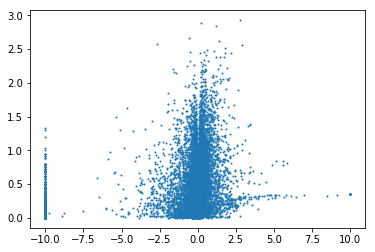

In [304]:
plt.scatter(x=combined_data['logFC'],y=combined_data['pvalue'].apply(lambda x:-np.log10(x)),s=1)